## Introduction
### 1. Link to original dataset:

https://www.kaggle.com/datasets/szegeelim/mental-health/data

### 2. Features:
The data set has three features
- index / row number 
- statements (text) were collected from various platforms, including social media, Reddit, Twitter, and others. Each entry is labeled with a specific mental health status. 
- mental health status (nominal, 7 categories: Normal, Depression, Suicidal, Anxiety, Stress, Bipolar, Personality Disorder)

### 3. Goal:
- Identification of mental health status through use of words and / or their frequency
- Find classifiers that - on the basis of a short text statements - can correctly identify the author's mental health status
- Find the best model out of the three selected classifiers 

### 4. Classsifiers to train and test:
- SVM
- Naive Bayes
- Neural Network


In [8]:
import pandas as pd
filename="Mental Health_Sentiment Analysis.csv"
df = pd.read_csv(filename)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53044 non-null  object
 1   statement   52681 non-null  object
 2   status      53042 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB
None


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


### Remove the extra column

In [9]:
df = df.drop(df.columns[0], axis=1)
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


### 1. Drop rows with missing values
### 2. Remove Stopwords (words that are very common and have little useful information)
### 3. Use Stemming (reduce words to their root form)
### 3. Make list of individual words (tokens) by splitting up the statements

In [10]:
#check for missing values in the statement and status column
print(df.isna().sum())

# 1. drop rows with any missing values

df = df.dropna(axis=0, how="any")

print(df.isna().sum())

# 2. Removing stopwords

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
print(stop)

to_remove = stop

def clean_statement(statement):
    
#     #merge contractions into one-word tokens    #### no longer needed, stopwords take care of it
    
#     statement = statement.replace("'", "")
    
#split statement into individual words, remove attached punctuation from words
    statement_words = statement.split()
    
    cleaned_words = []  
    
    for word in statement_words:  
        word = word.lower().rstrip(",.;")   #since stopword list is lower case but there are upper case words in the statements
        
        if word not in to_remove and word:  
            cleaned_words.append(word)  

    # convert lists of words into string with spaces in between --- necesssary further processing with CountVectorizer
    return " ".join(cleaned_words)

#call function on statement column
df["statement"] = df["statement"].apply(clean_statement)

# 3. Stemming
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def stemming(statement_words):
    statement_words = statement_words.split()     #split into words
    res_stemming = [porter.stem(word) for word in statement_words]
    return " ".join(res_stemming)


## use apply to apply to each word in each row in statement column 
df["statement"] = df["statement"].apply(stemming)

#check
df.head()

statement    363
status         2
dtype: int64
statement    0
status       0
dtype: int64
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,statement,status
0,oh gosh,Anxiety
1,troubl sleep confus mind restless heart tune,Anxiety
2,wrong back dear forward doubt stay restless re...,Anxiety
3,shift focu someth els still worri,Anxiety
4,restless restless month boy mean?,Anxiety


### Bag-of-words: 

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

#make the statement column into a np.array

statements = np.array(df["statement"])
print(type(statements))

#making the vocabulary 
bag = count.fit_transform(statements)

#print(count.vocabulary_)

#feature vectors
#print(bag.toarray())

<class 'numpy.ndarray'>


#### Account for word high frequencies across categories with lower weights

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
statement_tfidf = tfidf.fit_transform(bag)
print(statement_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2105520 stored elements and shape (52680, 49344)>
  Coords	Values
  (0, 18880)	0.8491520503415483
  (0, 31178)	0.5281484596216718
  (1, 10162)	0.365930138545087
  (1, 20087)	0.29948949832469857
  (1, 28181)	0.26821770259959354
  (1, 36581)	0.40395126904621403
  (1, 39585)	0.24805249326768672
  (1, 44562)	0.37325775159022634
  (1, 44739)	0.5834658703019707
  (2, 5405)	0.1771015555418144
  (2, 11727)	0.3983220797635969
  (2, 13559)	0.3251384046926843
  (2, 17337)	0.2894687194028869
  (2, 33451)	0.22900043804404857
  (2, 36581)	0.6782208618236593
  (2, 40939)	0.23276601167718
  (2, 48341)	0.2320833553905299
  (3, 14589)	0.33077427692717204
  (3, 17103)	0.4932485084105048
  (3, 38854)	0.5824214001324612
  (3, 40124)	0.2910307343221909
  (3, 41064)	0.2897909583033308
  (3, 48186)	0.3733656538935866
  (4, 7174)	0.41694250522469944
  (4, 27447)	0.2862672709372105
  :	:
  (52679, 14589)	0.0920644905551433
  (52679, 15535)	0.15314053

### Preparing the target

#### Histogram

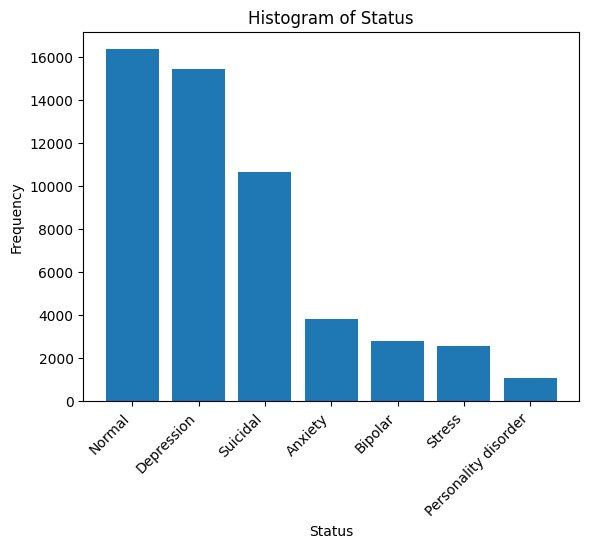

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

status_counts = df["status"].value_counts()

plt.bar(status_counts.index, status_counts.values)
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.xticks(rotation = 45, ha="right")
plt.title("Histogram of Status")

plt.show()

#### Encoding the classes

In [14]:
print("Unique values in 'status':", df["status"].unique())

status_mapped = {"Suicidal": 1,  "Depression": 2, "Bipolar" : 3, "Anxiety" : 4, "Personality disorder": 5,  "Stress": 6, "Normal": 7}

df["status_mapped"] = df["status"].map(status_mapped)
df.head(10)


Unique values in 'status': ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


,statement,status,status_mapped
0,oh gosh,Anxiety,4
1,troubl sleep confus mind restless heart tune,Anxiety,4
2,wrong back dear forward doubt stay restless re...,Anxiety,4
3,shift focu someth els still worri,Anxiety,4
4,restless restless month boy mean?,Anxiety,4
5,everi break must nervou like someth wrong heck,Anxiety,4
6,feel scare anxiou do? may famili us protect :),Anxiety,4
7,ever felt nervou know why?,Anxiety,4
8,slept well 2 day like restless huh :([],Anxiety,4
9,realli worri want cri,Anxiety,4


### Training / Test Sets

In [15]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

X = statement_tfidf
y = df["status_mapped"]
print(y)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape, y_train.shape)

print(type(X_train))


0        4
1        4
2        4
3        4
4        4
        ..
53039    4
53040    4
53041    4
53042    4
53043    4
Name: status_mapped, Length: 52680, dtype: int64
(36876, 49344) (36876,)
<class 'scipy.sparse._csr.csr_matrix'>


### Pipelines for the three models

#### Pipeline with Gridsearch for SVM

- Scaling: <br>

MaxAbsScaler (for sparse matrices)

- Dimensionality reduction:

LDA does not work (due to its computational complexity).

PCA does not work with sparse matrices and conversion to array requires too memory.

&rarr; Alternative:  <b>truncated SVD</b> (Singular Value Decomposition aka LSA):

(see sklearn documentation (https://scikit-learn.org/stable/modules/decomposition.html#lsa)) : 
"When truncated SVD is applied to term-document matrices (as returned by CountVectorizer or TfidfVectorizer), 
this transformation is known as latent semantic analysis (LSA), because it transforms such matrices to a “semantic” space of low dimensionality. 
In particular, LSA is known to combat the effects of synonymy and polysemy (both of which roughly mean there are multiple meanings per word), 
which cause term-document matrices to be overly sparse and exhibit poor similarity under measures such as cosine similarity."


<b>Problem</b>:
TruncatedSVD requires exact number of components set as parameter for the pipeline.<br>

<b>Solution</b>:
run SVD first individually (using trial and error for n_components) to find number of components for a certain cumulative variance.<br>
For 85% explained variance n = 5000 components are needed.<br>
For 80% explained variance n = 3536 components are needed.<br>
Choose n = 3536 components. 

In [16]:
# # # Fit SVD first to avoid error in pipeline
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000)

svd.fit(X_train)

res=svd.explained_variance_ratio_

print(res)

cumulative_variance = np.cumsum(res)  
print(cumulative_variance)

n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components that explain 80% variance: {n_components_80}")


[1.34474995e-02 5.60740304e-03 4.68662479e-03 ... 2.52532311e-05
 2.52110322e-05 2.52094144e-05]
[0.0134475  0.0190549  0.02374153 ... 0.84935553 0.84938074 0.84940595]
Number of components that explain 80% variance: 3536


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD ## instead of PCA
from sklearn.preprocessing import MaxAbsScaler

#Pipeline 
pipeline_svm = Pipeline([
    ('scaler', MaxAbsScaler()),
   ('svd', TruncatedSVD(n_components= 3600 )),
    ('svm', SVC(random_state=1))
    ])                 
                     
# define parameter grid     

params_svm = {
    'svm__C': [0.01, 0.1, 1],
    'svm__kernel': ['linear'],  ##skip poly and rbf
                                #'svm__degree' : [2,3],
    'svm__class_weight' : ['balanced']
}

#GridSearch
rs_svm = RandomizedSearchCV(pipeline_svm, param_distributions=params_svm, n_iter=3, scoring='balanced_accuracy', cv=3, verbose = 0)

#Fit the GridSearch

rs_svm.fit(X_train, y_train)

print(rs_svm.best_score_)
print(rs_svm.best_params_)

#### Prediction: Best SVM model

In [ ]:
#best pipeline
best_pipeline_svm = gs_svm.best_estimator_

#prediction
y_pred_svm = best_pipeline_svm.predict(X_test)

#### Gridsearch for NB

In [19]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

params_cnb = {'alpha' : [0, 0.001, 0.01, 0.25, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0]}

gs_cnb = GridSearchCV(ComplementNB(), param_grid=params_cnb, scoring="balanced_accuracy", cv=5)    
                     
#Fit the GridSearch

gs_cnb.fit(X_train, y_train)
                      
print(gs_cnb.best_score_)
print(gs_cnb.best_params_)

c:\Users\maren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1045: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))
c:\Users\maren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1045: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))
c:\Users\maren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1045: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))
c:\Users\maren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1045: RuntimeWarning: divide by zero encountered in log
  logged = np.log(comp_count / comp_count.sum(axis=1, keepdims=True))
c:\Users\maren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:1045: RuntimeWar

0.5713145932719245
{'alpha': 0.01}


### Prediction Naive Bayes

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#best estimator
best_cnb = gs_cnb.best_estimator_

#prediction
y_pred_cnb = best_cnb.predict(X_test)

cnb_accuracy = accuracy_score(y_test, y_pred_cnb)
cnb_f1 = f1_score(y_test, y_pred_cnb, average = "weighted")
cm_cnb = confusion_matrix(y_test, y_pred_cnb)

print(cnb_accuracy, cnb_f1)
print(classification_report(y_test, y_pred_cnb))
print(cm_cnb)

0.6071247785370792 0.6123899141821881
              precision    recall  f1-score   support

           1       0.54      0.61      0.57      3195
           2       0.60      0.60      0.60      4621
           3       0.56      0.72      0.63       833
           4       0.54      0.81      0.64      1153
           5       0.20      0.38      0.27       323
           6       0.43      0.33      0.37       776
           7       0.83      0.61      0.70      4903

    accuracy                           0.61     15804
   macro avg       0.53      0.58      0.54     15804
weighted avg       0.64      0.61      0.61     15804

[[1943  840   79   87   42   44  160]
 [1078 2773  168  232   58   72  240]
 [  41   89  600   41    6   17   39]
 [  18   84   36  932    7   22   54]
 [  30  110   12   10  123   10   28]
 [  72  188   48  126   14  253   75]
 [ 422  535  133  314  355  173 2971]]


#### Pipeline for NN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

#Pipeline 
pipeline_mlp = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('svd', TruncatedSVD(n_components=3600)),
    ('mlp', MLPClassifier(random_state=1, max_iter=500))
    ])                 
                     
# define parameter grid     

params_mlp = {
    'mlp__hidden_layer_sizes': [(50, 25 ), (100, 50 )],
    'mlp__activation': ['relu'],
    'mlp__solver' : ['adam'],
    'mlp__batch_size' : [64],
    'mlp__learning_rate' : ["constant"]
}

#GridSearch
gs_mlp = GridSearchCV(pipeline_mlp, param_grid=params_mlp, scoring='balanced_accuracy', cv=5, verbose = 1)

#Fit the GridSearch

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_score_)

### Prediction MLP

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#best estimator
best_mlp = gs_mlp.best_estimator_

#prediction
y_pred_mlp = best_mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp, average = "weighted")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

print(mlp_accuracy, cnb_f1)
print(classification_report(y_test, y_pred_mlp))
print(cm_mlp)


0.7151986838774994 0.6123899141821881
              precision    recall  f1-score   support

           1       0.59      0.65      0.62      3195
           2       0.67      0.62      0.65      4621
           3       0.76      0.73      0.74       833
           4       0.74      0.76      0.75      1153
           5       0.61      0.57      0.59       323
           6       0.49      0.48      0.49       776
           7       0.88      0.88      0.88      4903

    accuracy                           0.72     15804
   macro avg       0.68      0.67      0.67     15804
weighted avg       0.72      0.72      0.72     15804

[[2073  850   29   19   12   46  166]
 [1172 2884   67  115   46  132  205]
 [  24   90  605   30   12   31   41]
 [  21   94   28  871   10   64   65]
 [  19   56   11   17  184   16   20]
 [  51  114   25   71   22  375  118]
 [ 175  216   31   54   18   98 4311]]


## Try another model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

#Pipeline 
pipeline_rf = Pipeline([
    ('svd', TruncatedSVD(n_components=3600)),
    ('rf', RandomForestClassifier(random_state=1))
    ])                 
              
#Parameter grid
params_rf = {
    'rf__n_estimators' : [50, 100],
    'rf__max_depth': [10, 20, 30],
    'rf__max_features' : ["sqrt", "log2"],
    'rf__class_weight' : ["balanced"],
    'rf__max_samples' : [0.5, 0.7]
}     

#grid search
gs_rf=GridSearchCV(pipeline_rf, param_grid=params_rf, cv= 5, scoring="balanced_accuracy")

gs_rf= gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)

#### Prediction: RF 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#best estimator
best_rf = gs_rf.best_estimator_

#prediction
y_pred_rf = best_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average = "weighted")
cm_rf = confusion_matrix(y_test, y_pred_mlp) 

print(rf_accuracy, rf_f1)
print(classification_report(y_test, y_pred_mlp))
print(cm_rf)

## Testing and Evaluating the Models 

### SVM

- The SVM model (training set) did not run with that many components.<br> 
&rarr; model could not be tested

### Naive Bayes

- The model correctly predicted the mental health status with an overall accuracy of 60% and f1-score of 61%.

There are a lot of False Negatives in the “depression” and “normal” categories 
&rarr; the model often misclassified “depression” words as “suicidal” and “normal” words as “suicidal”  or “depression.”

### Neural Network

- The model correctly predicted the status with an overall accuracy of 72% and f1-score of 61%.

There are a lot of False Negatives in the “depression” category<br> 
&rarr;  the model misclassified “depression” words as “suicidal.”


### Random Forest

- The model did not finish training after 1635 minutes 
&rarr; the model could not be tested.

## Compare Model performance

### Comparing the metrics of the three models:

 | Metric| NB |MLP |
 | --- | --- | --- |
 | accuracy | 0.60 | 0.72 |
 | f1-score | 0.61 | 0.61 |

## Conclusion

#### General:
#### General:
The naïve Bayes and the MLP classifiers yielded similar results. <br>
The results suggest that both models were able to predict the mental health status correctly for <b>only 2/3 of examples (61%)</b>. 


#### Ethical Considerations:

Especially considering these results mental health can and should not be assessed using written words (even if the models’ predictions would have been more accurate). 

#### Further steps to improve model performance: 

- Take emojis into account
- Consider phrases / combinations of words
- take semantics into account